# Phylogenetic Distance Calculation from RhizCG 2013

Test hypotheses on phylogenetic vs functional control of microbial community
Use phylogeny created from rbcL and matK in phylogenerator 20160209_phylogeny.tre. 
Test hypothesis on overall dataset, then subgroups

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(foreach)
#library(lsmeans)
library(Hmisc)
#library(lme4)
#library(lmerTest)
library(nlme)
library(ggplot2)
library(plyr)
library(dplyr)
library(tidyr)
#library(pbkrtest)
library(gridExtra)
library(reshape2)
#library(picante)
library(ape)
library(doParallel)
library(MuMIn)
library(phyloseq)



/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: survival

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Formula

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rp

In [3]:
%%R
# Initialize corMLPE 
source('/home/bryan/corMLPE/corMLPE.R')

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘Matrix’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:tidyr’:

    expand


  warnings.warn(x, RRuntimeWarning)


In [4]:
%%R
workDir = '/home/bryan/RhizCG/PhyDist/'


# Data wrangling 

# Set up tables and tree 

In [5]:
%%R
setwd(workDir)
# read phylogenetic distance, expanded with 0.0002 between maize lines
phy_expand = read.csv(file = "phyDist_expanded.csv", header = TRUE)
colnames(phy_expand)[12] = "75-062"

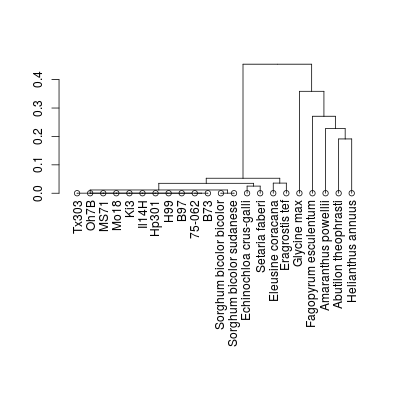

In [6]:
%%R -w 400 -h 400

# simplify, re-order matrix so that plants appear in same order as they are in the legend key.  then 
Mat = phy_expand
colnames(Mat) = c("Fagopyrum esculentum", "Amaranthus powellii", "Helianthus annuus", "Abutilon theophrasti",
                 "Glycine max", "Sorghum bicolor bicolor", "B73", "Echinochloa crus-galli", 
                  "Setaria faberi",  "Eragrostis tef","Eleusine coracana", "75-062", "Oh7B", "MS71", "B97",
                  "H99", "Il14H", "Ki3", "Tx303","Hp301", "Mo18", "Sorghum bicolor sudanese")
rownames(Mat) = c("Fagopyrum esculentum", "Amaranthus powellii", "Helianthus annuus", "Abutilon theophrasti",
                 "Glycine max", "Sorghum bicolor bicolor", "B73", "Echinochloa crus-galli", 
                  "Setaria faberi",  "Eragrostis tef","Eleusine coracana", "75-062", "Oh7B", "MS71", "B97",
                  "H99", "Il14H", "Ki3", "Tx303","Hp301", "Mo18", "Sorghum bicolor sudanese")

Mat = Mat[c("75-062", "B73", "B97" ,  "H99" , "Hp301",  "Il14H",  "Ki3" , "Mo18", "MS71","Oh7B", "Tx303",
             "Echinochloa crus-galli", "Setaria faberi", "Sorghum bicolor bicolor", "Sorghum bicolor sudanese",
            "Eleusine coracana", "Eragrostis tef", 
           "Abutilon theophrasti","Helianthus annuus","Fagopyrum esculentum", "Amaranthus powellii","Glycine max"),
         c("75-062", "B73", "B97" ,  "H99" , "Hp301",  "Il14H",  "Ki3" , "Mo18", "MS71","Oh7B", "Tx303",
             "Echinochloa crus-galli", "Setaria faberi", "Sorghum bicolor bicolor", "Sorghum bicolor sudanese",
            "Eleusine coracana", "Eragrostis tef", 
           "Abutilon theophrasti","Helianthus annuus","Fagopyrum esculentum", "Amaranthus powellii","Glycine max"),]

Phy_hc = hclust(as.dist(Mat), "complete")
hcd = as.dendrogram(Phy_hc)
# vector of colors to match CAP plot


labelColors = #c("#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        #"#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        #"#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")


# cut dendrogram in 4 clusters
clusMember = cutree(Phy_hc, 22)
#function to get color labels
colLab <- function(n) {
    if (is.leaf(n)) {
        a <- attributes(n)
        labCol <- labelColors[clusMember[which(names(clusMember) == a$label)]]
        attr(n, "nodePar") <- c(a$nodePar, lab.col = labCol)
    }
    n
}
# using dendrapply
clusDendro = dendrapply(hcd, colLab)
# make plot
par(mar=c(14,4.1,4.1,2.1))
plot(clusDendro, no.margin = TRUE)


# plot(Phy_hc, hang = -1)




## Create melted dataframes for plot by plot comparisons

In [7]:
%%R
pd.m = melt(as.matrix(phy_expand))

#set column names and create comparison column
colnames(pd.m) = c("PlantA", "PlantB", "phy_Dist")
pd.m$PlantComp = paste(pd.m$PlantA, pd.m$PlantB, sep = "-")
pd.m 


    PlantA PlantB phy_Dist     PlantComp
1    FAGES  FAGES  0.00000   FAGES-FAGES
2    AMAPO  FAGES  0.23210   AMAPO-FAGES
3    HELAN  FAGES  0.25302   HELAN-FAGES
4    ABUTH  FAGES  0.27096   ABUTH-FAGES
5    GLYMA  FAGES  0.35879   GLYMA-FAGES
6    SORBI  FAGES  0.43476   SORBI-FAGES
7      B73  FAGES  0.43787     B73-FAGES
8    ECHCG  FAGES  0.43985   ECHCG-FAGES
9    SETFA  FAGES  0.43592   SETFA-FAGES
10   ERATE  FAGES  0.44622   ERATE-FAGES
11   ELCOR  FAGES  0.44745   ELCOR-FAGES
12  75-062  FAGES  0.43787  75-062-FAGES
13    Oh7B  FAGES  0.43787    Oh7B-FAGES
14    MS71  FAGES  0.43787    MS71-FAGES
15     B97  FAGES  0.43787     B97-FAGES
16     H99  FAGES  0.43787     H99-FAGES
17   Il14H  FAGES  0.43787   Il14H-FAGES
18     Ki3  FAGES  0.43787     Ki3-FAGES
19   Tx303  FAGES  0.43787   Tx303-FAGES
20   Hp301  FAGES  0.43787   Hp301-FAGES
21    Mo18  FAGES  0.43787    Mo18-FAGES
22  SORSUD  FAGES  0.43476  SORSUD-FAGES
23   FAGES  AMAPO  0.23210   FAGES-AMAPO
24   AMAPO  AMAP

In [8]:
%%R
pd.m %>% filter(PlantA == "B73")

   PlantA PlantB phy_Dist  PlantComp
1     B73  FAGES  0.43787  B73-FAGES
2     B73  AMAPO  0.39437  B73-AMAPO
3     B73  HELAN  0.35807  B73-HELAN
4     B73  ABUTH  0.35681  B73-ABUTH
5     B73  GLYMA  0.44464  B73-GLYMA
6     B73  SORBI  0.01153  B73-SORBI
7     B73    B73  0.00000    B73-B73
8     B73  ECHCG  0.03504  B73-ECHCG
9     B73  SETFA  0.03111  B73-SETFA
10    B73  ERATE  0.04967  B73-ERATE
11    B73  ELCOR  0.05090  B73-ELCOR
12    B73 75-062  0.00020 B73-75-062
13    B73   Oh7B  0.00020   B73-Oh7B
14    B73   MS71  0.00020   B73-MS71
15    B73    B97  0.00020    B73-B97
16    B73    H99  0.00020    B73-H99
17    B73  Il14H  0.00020  B73-Il14H
18    B73    Ki3  0.00020    B73-Ki3
19    B73  Tx303  0.00020  B73-Tx303
20    B73  Hp301  0.00020  B73-Hp301
21    B73   Mo18  0.00020   B73-Mo18
22    B73 SORSUD  0.01153 B73-SORSUD


In [9]:
%%R
#Read rarified phyloseq object
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_r')
physeq.Full = readRDS(F)

physeq.Nneg = subset_samples(physeq.Full, Treatment == "Nneg" & Plant != "BARE")
physeq.Nneg = filter_taxa(physeq.Nneg, function(x) sum(x > 0) > 0, TRUE)  
physeq.Nneg

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4927 taxa and 87 samples ]
sample_data() Sample Data:       [ 87 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4927 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4927 tips and 4926 internal nodes ]


In [10]:
%%R
m.phy = merge_samples(physeq.Nneg, "Plant") %>%

    transform_sample_counts(function(x) x/sum(x))

# Overall dataset

In [11]:
%%R
registerDoParallel(cores=28)
phy.wunif.dist = distance(m.phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)


### Melt unifrac distances

In [12]:
%%R
ud = as.matrix(phy.wunif.dist) 
# remove lower triangle to remove duplicate values
ud[ lower.tri( ud, diag = TRUE ) ]  <- NA
head(ud)
ud.m = melt(ud, na.rm= TRUE)

# rename columns
colnames(ud.m) = c("PlantA", "PlantB", "w_Unif_Dist")
head(ud.m) %>% print
dim(ud.m) %>% print

   PlantA PlantB w_Unif_Dist
23 75-062  ABUTH   0.1657071
45 75-062  AMAPO   0.1988700
46  ABUTH  AMAPO   0.1532747
67 75-062    B73   0.1545134
68  ABUTH    B73   0.1923347
69  AMAPO    B73   0.1979983
[1] 231   3


### Create seed size  variable

In [13]:
%%R
#add seed size
Plant = c("ERATE", "HELAN", "B73", "FAGES", "AMAPO", "SORSUD", "SORBI", 
          "ELCOR", "ECHCG", "ABUTH", "SETFA", "GLYMA", "MS71", "Mo18", "Il14H", "Tx303", "Oh7B",
         "B97", "Hp301", "75-062", "Ki3", "H99")
SeedSize_mg = c(.0035, 90, 333, 38, .49, 10.7, 32.39,
               3.2, 1.58, 9.6, 1.8, 174, 264, 224, 219, 279, 207,
               240, 87, 222, 228, 231)
SS = cbind(Plant, SeedSize_mg) %>% as.data.frame
head(SS) %>% print
SS$SeedSize_mg = SS$SeedSize_mg %>% as.character %>% as.numeric

## Create functional distance variables
sd = sample_data(physeq.Nneg)

# join seed size with sample data
sd = left_join(sd, SS, by = "Plant")
rownames(sd) = sd$X.sample
sample_data(physeq.Nneg) = sd

   Plant SeedSize_mg
1  ERATE      0.0035
2  HELAN          90
3    B73         333
4  FAGES          38
5  AMAPO        0.49
6 SORSUD        10.7


In [14]:
%%R
## Create functional distance variables
sd.m = group_by(sd,Plant) %>%
    summarize(SS = mean(SeedSize_mg),
                CN = mean(A_Resid_logCN),
                 N = mean(A_Resid_logN),
                 Day = first(DAP)) %>%
    as.data.frame()
rownames(sd.m) = as.character(sd.m$Plant)


#measure distances on residCN
CNdist = dist(sd.m %>% select(CN), method = "euclidian")
    #melt matrix
    CN.m = melt(as.matrix(CNdist))

    #set column names and create comparison column
     colnames(CN.m) = c("PlantA", "PlantB", "CNdist")
    CN.m$PlantComp = paste(CN.m$PlantA, CN.m$PlantB, sep = "-")
    CN.m %>% head %>% print

#measure distances on residBiomass
Ndist = dist(sd.m %>% select(N), method = "euclidian")
    #melt matrix
    N.m = melt(as.matrix(Ndist))

    #set column names and create comparison column
     colnames(N.m) = c("PlantA", "PlantB", "Ndist")
    N.m$PlantComp = paste(N.m$PlantA, N.m$PlantB, sep = "-")
    N.m %>% head %>% print

# #measure distances on Seed Size
sd.m$logSS = log(sd.m$SS)

SSdist = dist(sd.m %>% select(logSS), method = "euclidian")
    #melt matrix
    SS.m = melt(as.matrix(SSdist))

    #set column names and create comparison column
     colnames(SS.m) = c("PlantA", "PlantB", "SSdist")
    SS.m$PlantComp = paste(SS.m$PlantA, SS.m$PlantB, sep = "-")
    SS.m %>% head %>% print


Fun.m = left_join(CN.m, N.m[,c(3,4)], by = "PlantComp")
Fun.m = left_join(Fun.m, SS.m[,c(3,4)], by = "PlantComp")
head(Fun.m)

  PlantA PlantB     CNdist     PlantComp
1 75-062 75-062 0.00000000 75-062-75-062
2  ABUTH 75-062 0.47818058  ABUTH-75-062
3  AMAPO 75-062 0.40194027  AMAPO-75-062
4    B73 75-062 0.11937512    B73-75-062
5    B97 75-062 0.06673497    B97-75-062
6  ECHCG 75-062 0.15230609  ECHCG-75-062
  PlantA PlantB      Ndist     PlantComp
1 75-062 75-062 0.00000000 75-062-75-062
2  ABUTH 75-062 0.72968730  ABUTH-75-062
3  AMAPO 75-062 0.93428683  AMAPO-75-062
4    B73 75-062 0.02394235    B73-75-062
5    B97 75-062 0.19012685    B97-75-062
6  ECHCG 75-062 0.25773331  ECHCG-75-062
  PlantA PlantB     SSdist     PlantComp
1 75-062 75-062 0.00000000 75-062-75-062
2  ABUTH 75-062 3.14091428  ABUTH-75-062
3  AMAPO 75-062 6.11602727  AMAPO-75-062
4    B73 75-062 0.40546511    B73-75-062
5    B97 75-062 0.07796154    B97-75-062
6  ECHCG 75-062 4.94525253  ECHCG-75-062
  PlantA PlantB     CNdist     PlantComp      Ndist     SSdist
1 75-062 75-062 0.00000000 75-062-75-062 0.00000000 0.00000000
2  ABUTH 75-0

### Join distance tables

In [15]:
%%R
colnames(ud.m)

[1] "PlantA"      "PlantB"      "w_Unif_Dist"


In [16]:
%%R
# #Add plant names to melted unifrac table
# ud.m = left_join(ud.m, sd[, c(1,9)], by = c("PlotA" = "X.sample"))
# head(ud.m) %>% print
# colnames(ud.m)[4] = "PlantA"

# ud.m = left_join(ud.m, sd[, c(1,9)], by = c("PlotB" = "X.sample"))
# head(ud.m) %>% print
# colnames(ud.m)[5] = "PlantB"
# ud.m$PlantComp = paste(ud.m$PlantA, ud.m$PlantB, sep = "-")

#Create Plant-Plant variable for joining with functional distance matrix
ud.m$PlantComp = paste(ud.m$PlantA, ud.m$PlantB, sep = "-")
head(ud.m) %>% print

   PlantA PlantB w_Unif_Dist    PlantComp
23 75-062  ABUTH   0.1657071 75-062-ABUTH
45 75-062  AMAPO   0.1988700 75-062-AMAPO
46  ABUTH  AMAPO   0.1532747  ABUTH-AMAPO
67 75-062    B73   0.1545134   75-062-B73
68  ABUTH    B73   0.1923347    ABUTH-B73
69  AMAPO    B73   0.1979983    AMAPO-B73


### Join with plant phylogenetic distance and functional distance

In [17]:
%%R
colnames(Fun.m)

[1] "PlantA"    "PlantB"    "CNdist"    "PlantComp" "Ndist"     "SSdist"   


In [18]:
%%R
colnames(pd.m)

[1] "PlantA"    "PlantB"    "phy_Dist"  "PlantComp"


In [19]:
%%R
sd.m %>% head

        Plant     SS          CN          N Day      logSS
75-062 75-062 222.00  0.38690305 -0.5568486  72  5.4026774
ABUTH   ABUTH   9.60 -0.09127753  0.1728387  57  2.2617631
AMAPO   AMAPO   0.49 -0.01503722  0.3774382  53 -0.7133499
B73       B73 333.00  0.50627817 -0.5807910  79  5.8081425
B97       B97 240.00  0.32016808 -0.7469755  79  5.4806389
ECHCG   ECHCG   1.58  0.23459696 -0.2991153  53  0.4574248


In [20]:
%%R
Dist = left_join(ud.m, pd.m[,c(3,4)], by = "PlantComp")
tail(Dist) %>% print


# Join DAP information and library information
Dist = left_join(Dist, sd.m[,c(1,5)], by = c("PlantA"= "Plant"))
colnames(Dist)[6] = c("DAY_A")
tail(Dist) %>% print

Dist = left_join(Dist, sd.m[,c(1,5)], by = c("PlantB" = "Plant"))
colnames(Dist)[7] = c("DAY_B")
tail(Dist) %>% print

# set DAY_A and DAY_B as factor
Dist$TimeDist = abs(as.numeric(as.character(Dist$DAY_A)) - as.numeric(as.character(Dist$DAY_B)))

Dist = left_join(Dist, Fun.m[,3:6], by = "PlantComp")

    PlantA PlantB w_Unif_Dist    PlantComp phy_Dist
226   Mo18  Tx303   0.1619509   Mo18-Tx303  0.00020
227   MS71  Tx303   0.1264014   MS71-Tx303  0.00020
228   Oh7B  Tx303   0.1300086   Oh7B-Tx303  0.00020
229  SETFA  Tx303   0.1402334  SETFA-Tx303  0.03111
230  SORBI  Tx303   0.1867076  SORBI-Tx303  0.01153
231 SORSUD  Tx303   0.2395445 SORSUD-Tx303  0.01153
    PlantA PlantB w_Unif_Dist    PlantComp phy_Dist DAY_A
226   Mo18  Tx303   0.1619509   Mo18-Tx303  0.00020    88
227   MS71  Tx303   0.1264014   MS71-Tx303  0.00020    72
228   Oh7B  Tx303   0.1300086   Oh7B-Tx303  0.00020    79
229  SETFA  Tx303   0.1402334  SETFA-Tx303  0.03111    61
230  SORBI  Tx303   0.1867076  SORBI-Tx303  0.01153    84
231 SORSUD  Tx303   0.2395445 SORSUD-Tx303  0.01153    84
    PlantA PlantB w_Unif_Dist    PlantComp phy_Dist DAY_A DAY_B
226   Mo18  Tx303   0.1619509   Mo18-Tx303  0.00020    88    88
227   MS71  Tx303   0.1264014   MS71-Tx303  0.00020    72    88
228   Oh7B  Tx303   0.1300086   Oh7B-T

### Add date variable to seperate analyses by date comparison

In [21]:
%%R
Dist$DateCombo = ifelse(as.numeric(as.character(Dist$DAY_A)) < as.numeric(as.character(Dist$DAY_B)),
                                                                    paste(Dist$DAY_A, Dist$DAY_B, sep = "-"), 
                                                                   paste(Dist$DAY_B, Dist$DAY_A, sep = "-"))
Dist$DateCombo %>% unique

 [1] "57-72" "53-72" "53-57" "72-79" "57-79" "53-79" "79-79" "53-53" "72-88"
[10] "57-88" "53-88" "79-88" "72-72" "36-72" "36-57" "36-53" "36-79" "36-88"
[19] "57-57" "72-84" "57-84" "53-84" "79-84" "84-88" "36-84" "88-88" "61-72"
[28] "57-61" "53-61" "61-79" "61-88" "36-61" "61-84" "84-84"


* which date combos do not have multiple comparisons

In [22]:
%%R
Dist %>%
    group_by(DateCombo) %>%
    mutate(n = length(PlantComp)) %>%
    ungroup %>%
    as.data.frame() %>%
    filter(n == 1) %>%
    .$DateCombo

[1] "53-53" "57-57" "36-61"


In [23]:
%%R
SubDist = Dist %>%
    group_by(DateCombo) %>%
    mutate(n = length(PlantComp)) %>%
    ungroup %>%
    as.data.frame() %>%
    filter(n > 1)

In [24]:
%%R
dim(SubDist)

[1] 228  13


## Build corMLPE models

* Null model

In [102]:
%%R
fitNull <- gls(w_Unif_Dist ~ 1,  correlation = corMLPE(form= ~ PlantA + PlantB), 
               data = SubDist, method = "ML")
summary(fitNull) %>% print

Generalized least squares fit by maximum likelihood
  Model: w_Unif_Dist ~ 1 
  Data: SubDist 
        AIC       BIC   logLik
  -735.6364 -725.3484 370.8182

Correlation Structure: corMLPE
 Formula: ~PlantA + PlantB 
 Parameter estimate(s):
      Rho 
0.2691344 

Coefficients:
                Value Std.Error  t-value p-value
(Intercept) 0.2008419 0.0140029 14.34288       0

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.84699530 -0.73778114 -0.03890198  0.58335744  3.17699334 

Residual standard error: 0.0618937 
Degrees of freedom: 228 total; 227 residual


In [95]:
%%R
fit1 <- gls(w_Unif_Dist ~ DateCombo, correlation = corMLPE(form= ~ PlantA + PlantB), 
               data = SubDist, method = "ML")
anova(fit1) %>% print

Denom. DF: 197 
            numDF  F-value p-value
(Intercept)     1 399.3045  <.0001
DateCombo      30   5.4413  <.0001


In [96]:
%%R
fit2 <- gls(w_Unif_Dist ~ DateCombo + phy_Dist, correlation = corMLPE(form= ~ PlantA + PlantB),
            data = SubDist, method = "ML")
anova(fit2) %>% print

Denom. DF: 196 
            numDF  F-value p-value
(Intercept)     1 529.2398  <.0001
DateCombo      30   5.6801  <.0001
phy_Dist        1   6.9777  0.0089


In [99]:
%%R
fit3 <- gls(w_Unif_Dist ~ DateCombo + poly(phy_Dist,2), correlation = corMLPE(form= ~ PlantA + PlantB),
            data = SubDist, method = "ML")
anova(fit3)

Denom. DF: 195 
                  numDF  F-value p-value
(Intercept)           1 593.5486  <.0001
DateCombo            30   5.8565  <.0001
poly(phy_Dist, 2)     2   6.5880  0.0017


In [116]:
%%R
anova(fitNull,fit1, fit3)

        Model df       AIC       BIC   logLik   Test   L.Ratio p-value
fitNull     1  3 -735.6364 -725.3484 370.8182                         
fit1        2 33 -812.7670 -699.5986 439.3835 1 vs 2 137.13062  <.0001
fit3        3 35 -822.2642 -702.2371 446.1321 2 vs 3  13.49719  0.0012


In [106]:
%%R
fit1R = MuMIn::r.squaredLR(fit1, null = fitNull)
fit2R = MuMIn::r.squaredLR(fit2, null = fit1)
fit3R = MuMIn::r.squaredLR(fit3, null = fit1)
paste("DateCombo R2:", fit1R) %>% print
paste("PhyDist R2:", fit2R) %>% print
paste("PhyDist^2 R2:", fit3R) %>% print

[1] "DateCombo R2: 0.451983619898929"
[1] "PhyDist R2: 0.0312099495596723"
[1] "PhyDist^2 R2: 0.0574800496377875"


### get coefficients

In [107]:
%%R
fit2a <- gls(w_Unif_Dist ~ I(phy_Dist) + I(phy_Dist^2),correlation = corMLPE(form= ~ PlantA + PlantB),
            data = SubDist, method = "ML")
summary(fit2a) %>% print

Generalized least squares fit by maximum likelihood
  Model: w_Unif_Dist ~ I(phy_Dist) + I(phy_Dist^2) 
  Data: SubDist 
        AIC       BIC   logLik
  -750.8057 -733.6589 380.4028

Correlation Structure: corMLPE
 Formula: ~PlantA + PlantB 
 Parameter estimate(s):
      Rho 
0.1842508 

Coefficients:
                   Value Std.Error   t-value p-value
(Intercept)    0.1660867 0.0122310 13.579193   0e+00
I(phy_Dist)    0.7380540 0.1764112  4.183713   0e+00
I(phy_Dist^2) -1.4453806 0.3861995 -3.742575   2e-04

 Correlation: 
              (Intr) I(p_D)
I(phy_Dist)   -0.491       
I(phy_Dist^2)  0.442 -0.989

Standardized residuals:
      Min        Q1       Med        Q3       Max 
-2.025848 -0.748187 -0.105398  0.611836  3.279085 

Residual standard error: 0.05227864 
Degrees of freedom: 228 total; 225 residual


In [119]:
%%R
anova(fitNull, fit2a)

        Model df       AIC       BIC   logLik   Test  L.Ratio p-value
fitNull     1  3 -735.6364 -725.3484 370.8182                        
fit2a       2  5 -750.8057 -733.6589 380.4028 1 vs 2 19.16925   1e-04


In [117]:
%%R
fit2aR = MuMIn::r.squaredLR(fit2a, null = fitNull)
paste("PhyDist^2, not controlling for date R2:", fit2aR) %>% print

[1] "PhyDist^2, not controlling for date R2: 0.0806383188404307"


# MLPE when intra-specific comparisons are removed

In [120]:
%%R

maize = c("B73", "MS71", "Mo18", "Il14H", "Tx303", "Oh7B",
         "B97", "Hp301", "75-062", "Ki3", "H99")

MaizeCompList = filter(SubDist, PlantA %in% maize & PlantB %in% maize) %>%
                    .$PlantComp %>%
                    unique()

SubDist_nss = filter(SubDist, !PlantComp %in% MaizeCompList) %>%
          group_by(DateCombo) %>%
          mutate(n = length(PlantComp)) %>%
          ungroup %>%
          as.data.frame() %>%
          filter(n > 1)
SubDist_nss %>% head

  PlantA PlantB w_Unif_Dist    PlantComp phy_Dist DAY_A DAY_B TimeDist
1 75-062  ABUTH   0.1657071 75-062-ABUTH  0.35681    72    57       15
2 75-062  AMAPO   0.1988700 75-062-AMAPO  0.39437    72    53       19
3  ABUTH  AMAPO   0.1532747  ABUTH-AMAPO  0.22746    57    53        4
4 75-062    B73   0.1545134   75-062-B73  0.00020    72    79        7
5  ABUTH    B73   0.1923347    ABUTH-B73  0.35681    57    79       22
6  AMAPO    B73   0.1979983    AMAPO-B73  0.39437    53    79       26
      CNdist      Ndist    SSdist DateCombo  n
1 0.47818058 0.72968730 3.1409143     57-72 10
2 0.40194027 0.93428683 6.1160273     53-72 10
3 0.07624031 0.20459953 2.9751130     53-57  4
4 0.11937512 0.02394235 0.4054651     72-79  8
5 0.59755570 0.75362964 3.5463794     57-79  8
6 0.52131539 0.95822918 6.5214924     53-79  8


In [109]:
%%R
fitNull_nss <- gls(w_Unif_Dist ~ 1, correlation = corMLPE(form= ~ PlantA + PlantB), 
               data = SubDist_nss, method = "ML")
summary(fitNull_nss) %>% print

Generalized least squares fit by maximum likelihood
  Model: w_Unif_Dist ~ 1 
  Data: SubDist_nss 
        AIC       BIC   logLik
  -537.8867 -528.4268 271.9434

Correlation Structure: corMLPE
 Formula: ~PlantA + PlantB 
 Parameter estimate(s):
      Rho 
0.1775846 

Coefficients:
                Value  Std.Error  t-value p-value
(Intercept) 0.2100701 0.01089179 19.28701       0

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.05273786 -0.59687662  0.05921698  0.71228488  3.32154441 

Residual standard error: 0.05642186 
Degrees of freedom: 173 total; 172 residual


In [110]:
%%R
fita_nss = gls(w_Unif_Dist ~ DateCombo, correlation = corMLPE(form= ~ PlantA + PlantB), 
               data = SubDist_nss, method = "ML")
fitb_nss = gls(w_Unif_Dist ~ DateCombo + phy_Dist, correlation = corMLPE(form= ~ PlantA + PlantB), 
               data = SubDist_nss, method = "ML")
anova(fita_nss, fitb_nss)

         Model df       AIC       BIC   logLik   Test L.Ratio p-value
fita_nss     1 32 -589.8725 -488.9672 326.9363                       
fitb_nss     2 33 -595.8036 -491.7449 330.9018 1 vs 2 7.93104  0.0049


In [112]:
%%R
fitc_nss <- gls(w_Unif_Dist ~ DateCombo + poly(phy_Dist,2), correlation = corMLPE(form= ~ PlantA + PlantB), 
               data = SubDist_nss, method = "ML")
anova(fitc_nss) %>% print

Denom. DF: 141 
                  numDF  F-value p-value
(Intercept)           1 819.8844  <.0001
DateCombo            29   4.5737  <.0001
poly(phy_Dist, 2)     2   4.9656  0.0082


In [113]:
%%R
anova(fitNull_nss, fita_nss, fitb_nss, fitc_nss)

            Model df       AIC       BIC   logLik   Test   L.Ratio p-value
fitNull_nss     1  3 -537.8867 -528.4268 271.9434                         
fita_nss        2 32 -589.8725 -488.9672 326.9363 1 vs 2 109.98581  <.0001
fitb_nss        3 33 -595.8036 -491.7449 330.9018 2 vs 3   7.93104  0.0049
fitc_nss        4 34 -595.9886 -488.7767 331.9943 3 vs 4   2.18501  0.1394


In [115]:
%%R
fitaR = MuMIn::r.squaredLR(fita_nss, null = fitNull_nss)
fitbR = MuMIn::r.squaredLR(fitb_nss, null = fita_nss)
fitcR = MuMIn::r.squaredLR(fitc_nss, null = fita_nss)
paste("date combo R2:", fitaR) %>% print
paste("PhyDist R2:", fitbR) %>% print
paste("PhyDist^2 R2:", fitcR) %>% print

[1] "date combo R2: 0.470465071595784"
[1] "PhyDist R2: 0.0448091967912523"
[1] "PhyDist^2 R2: 0.0567974967240149"


# Graphs

In [69]:
%%R
theme_pub = function (base_size = 11, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
    }

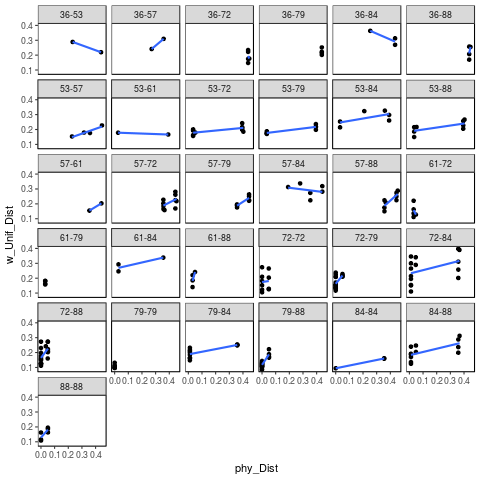

In [70]:
%%R
p = ggplot(SubDist, aes(x = phy_Dist, y = w_Unif_Dist))
           p = p + geom_point()
            p = p + theme_pub()
        p = p + stat_smooth(method = "lm", se = FALSE)
           p = p + facet_wrap(~DateCombo)
p

## Phylogenetic distance graph

* Use full dataset

In [42]:
%%R
# get coefficients from phylogenetic model
i2a = intervals(fit2a)$fixed %>% as.data.frame()
rownames(i2a) %>%print

i2a

[1] "(Intercept)"   "I(phy_Dist)"   "I(phy_Dist^2)"
                   lower       est.      upper
(Intercept)    0.1486324  0.1665771  0.1845219
I(phy_Dist)    0.2705303  0.5146473  0.7587642
I(phy_Dist^2) -1.4193849 -0.8623024 -0.3052200


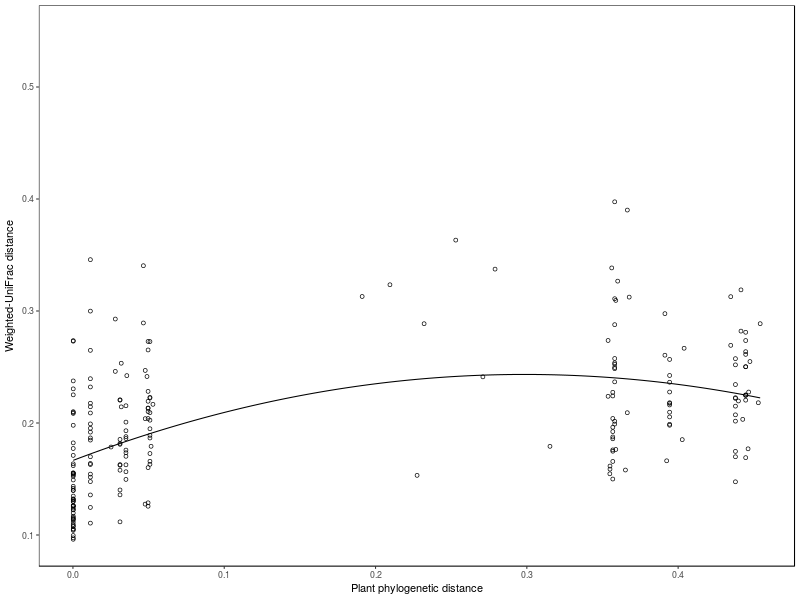

In [127]:
%%R -w 800 -h 600



test <- function(x) {i2a$est[3]*x^2 + i2a$est[2]*x + i2a$est[1]}
test.semin <- function(x) {i2a$lower[3]*x^2 + i2a$lower[2]*x + i2a$lower[1]}
test.semax <- function(x) {i2a$upper[3]*x^2 + i2a$upper[2]*x + i2a$upper[1]}


# test <- function(x) {0.09933092*x + 0.20839614}
# test.semin <- function(x) {0.0487613*x +  0.1784336}
# test.semax <- function(x) {0.1499005*x + 0.2383587}

p = ggplot(SubDist, aes(y = w_Unif_Dist, x = phy_Dist)) 
p = p + geom_point(pch = 21) #aes(size = phy_Dist), shape = 1)
#p = p + stat_smooth(method = "lm", se = FALSE)
p = p + theme_pub()
p = p + ylim(c(.095,.55))
#p = p + theme(panel.border = element_blank()) 
#p = p + theme(axis.line.x = element_line(color="black", size = 1),
 #   axis.line.y = element_line(color="black", size = 1))

# p = p + stat_smooth(method = lm, y ~ poly(x,2), se = TRUE)
p = p + stat_function(fun = test)
# p = p + stat_function(fun = test.semin, linetype = "dashed")
# p = p + stat_function(fun = test.semax, linetype = "dashed")
# p = p + stat_smooth(method = "lm", se = FALSE)
p = p + labs(x = "Plant phylogenetic distance")
p = p + labs(y = "Weighted-UniFrac distance")

p

### save file in grid arrange to allow for easy join to remainder of panel graph

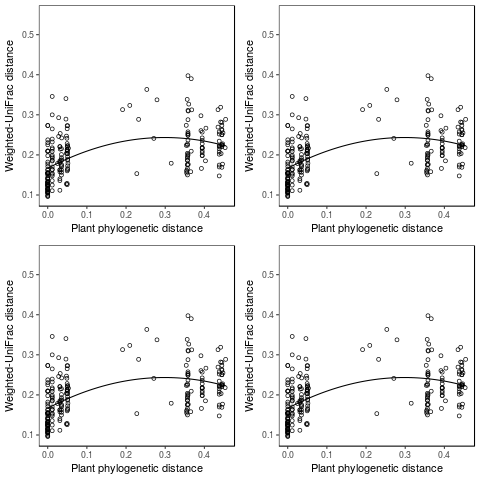

In [128]:
%%R
grid.arrange(p,p,p,p, ncol = 2)

In [129]:
%%R
svg(filename = '/home/bryan/RhizCG/figures/ms_figures/betaDiversity_JustPhylogenetic_revised.svg', width = 7.08, height = 5)
grid.arrange(p,p,p,p, ncol = 2)
dev.off()

png 
  2 
